<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_isSymmetric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
A tree is symmetric if its data and shape remain unchanged when it is reflected about the root node. The following tree is an example:
```
        4
      / | \
    3   5   3
  /           \
9              9
```
Given a k-ary tree, determine whether it is symmetric.

##Solution:
To solve this task, I'll implement a Python utility function that determines if a given k-ary tree is symmetric. The tree will be represented using a node class with an attribute for data and a list of children. I'll also create a test suite to validate the function without interrupting the flow of the main code, using Python's `unittest` framework. The test results will be output aesthetically using the `unittest` module's verbose option, providing clear and readable output.

Here's the plan:

1. Define a `TreeNode` class to represent a node in the k-ary tree.
2. Implement the `isSymmetric` utility function to check if the tree is symmetric.
3. Create a test suite using Python's `unittest` module.
4. Run the tests and ensure they don't interrupt the main code flow.

In this test suite, I've created two tests: one for a symmetric tree and another for an asymmetric tree. The `unittest.main` function is called with special arguments to prevent it from calling `sys.exit()` which would interrupt the flow of the script.

This setup allows for easy addition of more test cases and provides clear, readable output of the test results.

##Implementation:

In [24]:
# TreeNode class definition
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

# Symmetry check function
def isSymmetric(root):
    def isMirror(left, right):
        if not left and not right:
            return True
        if not left or not right:
            return False
        if left.value != right.value:
            return False

        return all(isMirror(l, r) for l, r in zip(left.children, reversed(right.children)))

    return isMirror(root, root)

In [ ]:
!apt-get install graphviz libgraphviz-dev pkg-config


In [ ]:
!pip install pygraphviz


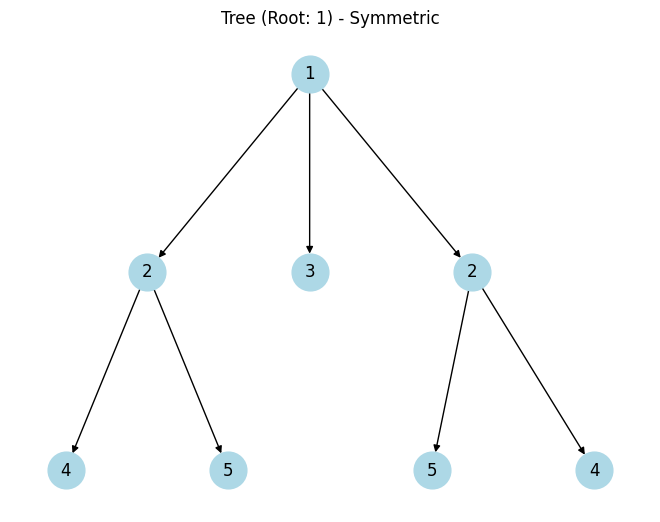

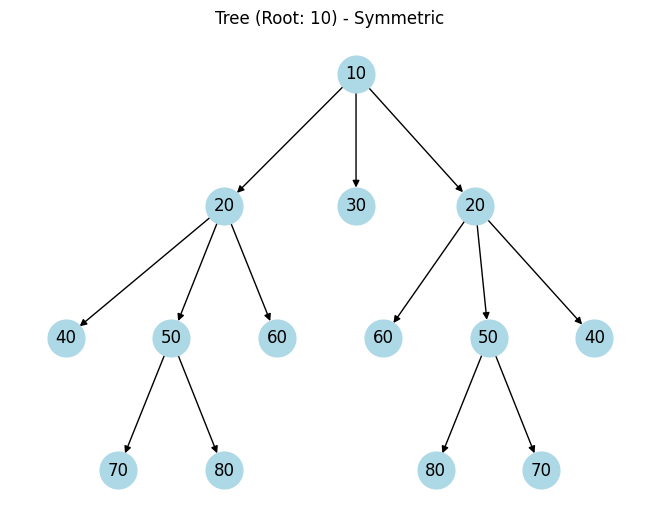

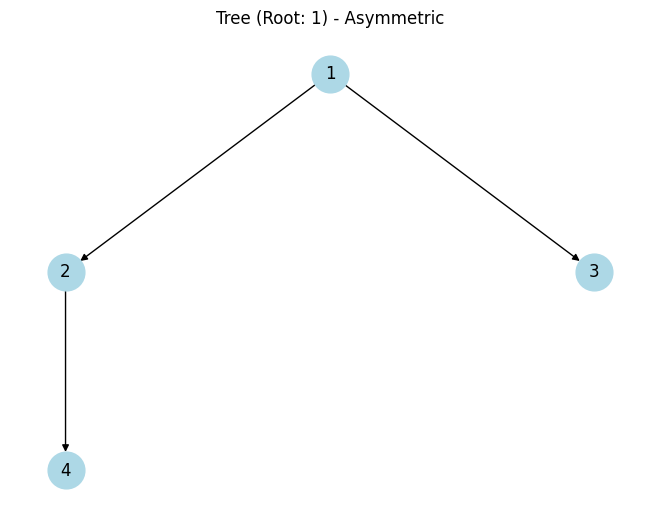

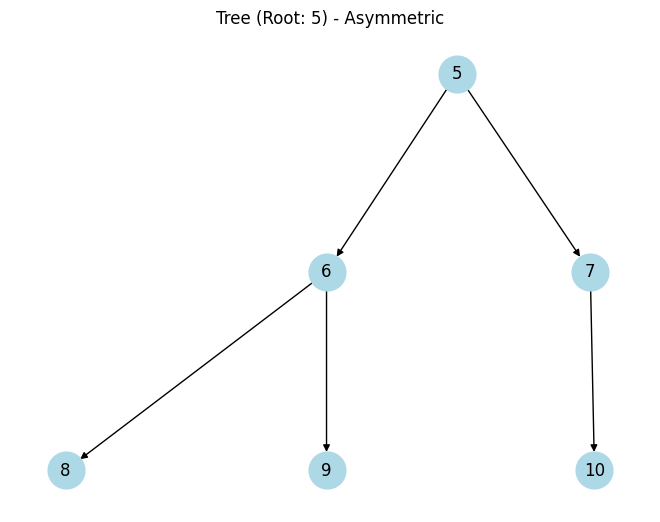

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Symmetric Tree Example 1
sym_tree_1 = TreeNode(1)
sym_tree_1.children = [TreeNode(2), TreeNode(3), TreeNode(2)]
sym_tree_1.children[0].children = [TreeNode(4), TreeNode(5)]
sym_tree_1.children[2].children = [TreeNode(5), TreeNode(4)]

# Symmetric Tree Example 2 (Large Tree)
sym_tree_2 = TreeNode(10)
sym_tree_2.children = [TreeNode(20), TreeNode(30), TreeNode(20)]
sym_tree_2.children[0].children = [TreeNode(40), TreeNode(50), TreeNode(60)]
sym_tree_2.children[2].children = [TreeNode(60), TreeNode(50), TreeNode(40)]
sym_tree_2.children[0].children[1].children = [TreeNode(70), TreeNode(80)]
sym_tree_2.children[2].children[1].children = [TreeNode(80), TreeNode(70)]

# Asymmetric Tree Example 1
asym_tree_1 = TreeNode(1)
asym_tree_1.children = [TreeNode(2), TreeNode(3)]
asym_tree_1.children[0].children = [TreeNode(4)]

# Asymmetric Tree Example 2
asym_tree_2 = TreeNode(5)
asym_tree_2.children = [TreeNode(6), TreeNode(7)]
asym_tree_2.children[0].children = [TreeNode(8), TreeNode(9)]
asym_tree_2.children[1].children = [TreeNode(10)]

# Graphical representation function for root-down tree layout
def plot_tree_root_down(root, title):
    G = nx.DiGraph()
    queue = deque([(root, None, 0)])
    node_labels = {}

    while queue:
        node, parent, depth = queue.popleft()
        node_id = f"{node.value}_{id(node)}"  # Unique identifier for each node
        node_labels[node_id] = node.value

        if parent:
            parent_id = f"{parent.value}_{id(parent)}"
            G.add_edge(parent_id, node_id)

        for child in node.children:
            queue.append((child, node, depth + 1))

    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=False, node_size=700, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    plt.title(title)
    plt.show()

# Function to display trees and their symmetry status
def display_trees_with_root_down(trees):
    for tree in trees:
        symmetry_status = "Symmetric" if isSymmetric(tree) else "Asymmetric"
        plot_tree_root_down(tree, f"Tree (Root: {tree.value}) - {symmetry_status}")

# Displaying the test trees
display_trees_with_root_down([sym_tree_1, sym_tree_2, asym_tree_1, asym_tree_2])
